In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:98% !important;}</style>'))

In [2]:
import numpy as np
import pandas as pd

import random
random.seed(28)
np.random.seed(28)

import itertools
import scipy

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
import os
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
from collections import defaultdict
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
import time
from collections import Counter
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from bayes_opt import BayesianOptimization
import eli5
import shap
from IPython.display import HTML
import json

from category_encoders.ordinal import OrdinalEncoder
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from typing import List

import os
import time
import datetime
import json
import gc
from numba import jit

from functools import partial
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import metrics
from typing import Any
from itertools import product
pd.set_option('max_rows', 500)
import re
from tqdm import tqdm
from joblib import Parallel, delayed

import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
from bayes_opt import BayesianOptimization
import shap

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
from time import time
from tqdm import tqdm_notebook as tqdm
from collections import Counter
from scipy import stats
import lightgbm as lgb
from sklearn.metrics import cohen_kappa_score, mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
import gc
import json
pd.set_option('display.max_columns', 1000)
np.random.seed(566)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

Using TensorFlow backend.


/kaggle/input/widsdatathon2020/training_v2.csv
/kaggle/input/widsdatathon2020/samplesubmission.csv
/kaggle/input/widsdatathon2020/unlabeled.csv
/kaggle/input/widsdatathon2020/WiDS Datathon 2020 Dictionary.csv
/kaggle/input/widsdatathon2020/solution_template.csv
/kaggle/input/hospital-cluster1/hospital_cluster1.csv


In [3]:
import numpy as np
from collections import Counter, defaultdict
from sklearn.utils import check_random_state

class RepeatedStratifiedGroupKFold():

    def __init__(self, n_splits=5, n_repeats=1, random_state=None):
        self.n_splits = n_splits
        self.n_repeats = n_repeats
        self.random_state = random_state
        
    # Implementation based on this kaggle kernel:
    #    https://www.kaggle.com/jakubwasikowski/stratified-group-k-fold-cross-validation
    def split(self, X, y=None, groups=None):
        k = self.n_splits
        def eval_y_counts_per_fold(y_counts, fold):
            y_counts_per_fold[fold] += y_counts
            std_per_label = []
            for label in range(labels_num):
                label_std = np.std(
                    [y_counts_per_fold[i][label] / y_distr[label] for i in range(k)]
                )
                std_per_label.append(label_std)
            y_counts_per_fold[fold] -= y_counts
            return np.mean(std_per_label)
            
        rnd = check_random_state(self.random_state)
        for repeat in range(self.n_repeats):
            labels_num = np.max(y) + 1
            y_counts_per_group = defaultdict(lambda: np.zeros(labels_num))
            y_distr = Counter()
            for label, g in zip(y, groups):
                y_counts_per_group[g][label] += 1
                y_distr[label] += 1

            y_counts_per_fold = defaultdict(lambda: np.zeros(labels_num))
            groups_per_fold = defaultdict(set)
        
            groups_and_y_counts = list(y_counts_per_group.items())
            rnd.shuffle(groups_and_y_counts)

            for g, y_counts in sorted(groups_and_y_counts, key=lambda x: -np.std(x[1])):
                best_fold = None
                min_eval = None
                for i in range(k):
                    fold_eval = eval_y_counts_per_fold(y_counts, i)
                    if min_eval is None or fold_eval < min_eval:
                        min_eval = fold_eval
                        best_fold = i
                y_counts_per_fold[best_fold] += y_counts
                groups_per_fold[best_fold].add(g)

            all_groups = set(groups)
            for i in range(k):
                train_groups = all_groups - groups_per_fold[i]
                test_groups = groups_per_fold[i]

                train_indices = [i for i, g in enumerate(groups) if g in train_groups]
                test_indices = [i for i, g in enumerate(groups) if g in test_groups]

                yield train_indices, test_indices

read the data

In [4]:
cluster= pd.read_csv("../input/hospital-cluster1/hospital_cluster1.csv")
train = pd.read_csv("../input/widsdatathon2020/training_v2.csv")
samplesubmission = pd.read_csv("../input/widsdatathon2020/samplesubmission.csv")
test = pd.read_csv("../input/widsdatathon2020/unlabeled.csv")
dictionary = pd.read_csv("../input/widsdatathon2020/WiDS Datathon 2020 Dictionary.csv")
solution_template = pd.read_csv("../input/widsdatathon2020/solution_template.csv")

train = train.merge(cluster,on='hospital_id')

test = test.merge(cluster,on='hospital_id')

print('train ' , train.shape)
print('test ' , test.shape)
print('samplesubmission ' , samplesubmission.shape)
print('solution_template ' , solution_template.shape)
print('dictionary ' , dictionary.shape)

train  (91698, 195)
test  (39308, 195)
samplesubmission  (3, 2)
solution_template  (39308, 2)
dictionary  (188, 6)


In [5]:
cluster.head()

,hospital_id,Standard deviation(age),Standard deviation(height),Standard deviation(weight),Standard deviation(urineoutput_apache),Mean(h1_platelets_min),Standard deviation(h1_platelets_min),Mean(h1_arterial_po2_min),Standard deviation(h1_arterial_po2_min),num_Cluster number_______________
0,1,0.62,0.28,0.44,0.57,0.18,0.24,0.23,0.32,68
1,2,0.72,0.26,0.43,0.62,0.31,0.24,0.17,0.26,67
2,3,0.68,0.16,0.61,0.00,0.99,0.27,0.22,0.24,41
3,4,0.90,0.21,0.43,0.59,0.00,0.00,0.25,0.06,24
4,5,0.81,0.27,0.42,0.68,0.40,0.28,0.33,0.58,59


OverView of the dataset

In [6]:
dico=pd.DataFrame(dictionary.T.head(6))
dico.columns=list(dico.loc[dico.index == 'Variable Name'].unstack())
dico = dico.loc[dico.index != 'Variable Name']
dico.columns
train_stat = pd.DataFrame(train.describe())
train_stat2 = pd.concat([dico,train_stat],axis=0)
train_stat2.head(20)

,Mean(h1_arterial_po2_min),Mean(h1_platelets_min),Standard deviation(age),Standard deviation(h1_arterial_po2_min),Standard deviation(h1_platelets_min),Standard deviation(height),Standard deviation(urineoutput_apache),Standard deviation(weight),age,aids,albumin_apache,apache_2_bodysystem,apache_2_diagnosis,apache_3j_bodysystem,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,bilirubin_apache,bmi,bun_apache,cirrhosis,creatinine_apache,d1_albumin_max,d1_albumin_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_heartrate_max,d1_heartrate_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_sodium_max,d1_sodium_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus,elective_surgery,encounter_id,ethnicity,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,gender,glucose_apache,h1_albumin_max,h1_albumin_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_heartrate_max,h1_heartrate_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_resprate_max,h1_resprate_min,h1_sodium_max,h1_sodium_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_wbc_max,h1_wbc_min,heart_rate_apache,height,hematocrit_apache,hepatic_failure,hospital_admit_source,hospital_death,hospital_id,icu_admit_source,icu_admit_type,icu_id,icu_stay_type,icu_type,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,num_Cluster number_______________,paco2_apache,paco2_for_ph_apache,pao2_apache,patient_id,ph_apache,pre_icu_los_days,pred,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
Category,nan,nan,nan,nan,nan,nan,nan,nan,demographic,APACHE comorbidity,APACHE covariate,APACHE grouping,APACHE covariate,APACHE grouping,APACHE covariate,APACHE prediction,APACHE prediction,APACHE covariate,APACHE covariate,APACHE covariate,demographic,APACHE covariate,APACHE comorbidity,APACHE covariate,labs,labs,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs,labs,labs,labs,labs,labs,labs,labs,vitals,vitals,vitals,vitals,vitals,vitals,labs,labs,labs,labs,vitals,vitals,labs,labs,labs,labs,labs,labs,labs,labs,vitals,vitals,vitals,vitals,vitals,vitals,labs blood gas,labs blood gas,labs,labs,labs,labs,vitals,vitals,labs,labs,vitals,v

In [7]:
train_stat2.T.to_csv('ICU_data_dictionnary.csv')
train_stat2.T.head(200)

,Category,Unit of Measure,Data Type,Description,Example,count,mean,std,min,25%,50%,75%,max
Mean(h1_arterial_po2_min),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.27,0.09,0.00,0.21,0.27,0.33,1.00
Mean(h1_platelets_min),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.32,0.10,0.00,0.26,0.31,0.37,1.00
Standard deviation(age),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.70,0.06,0.13,0.67,0.70,0.73,1.00
Standard deviation(h1_arterial_po2_min),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.45,0.12,0.00,0.39,0.46,0.52,0.94
Standard deviation(h1_platelets_min),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.27,0.04,0.00,0.25,0.27,0.29,1.00
Standard deviation(height),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.27,0.02,0.13,0.26,0.27,0.28,1.00
Standard deviation(urineoutput_apache),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.54,0.21,0.00,0.52,0.59,0.64,1.00
Standard deviation(weight),NaN,NaN,NaN,NaN,NaN,"91,698.00",0.42,0.03,0.11,0.40,0.42,0.44,1.00
age,demographic,Years,numeric,The age of the patient on unit admission,None,"87,472.00",62.31,16.77,16.00,52.00,65.00,75.00,89.00
aids,APACHE comorbidity,None,binary,Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone),1,"90,983.00",0.00,0.03,0.00,0.00,0.00,0.00,1.00


In [8]:
# function to evaluate the score of our model
def eval_auc(pred,real):
    false_positive_rate, recall, thresholds = roc_curve(real, pred)
    roc_auc = auc(false_positive_rate, recall)
    return roc_auc    

In [9]:
# a wrapper class to that we can have the same ouput whatever the model we choose
class Base_Model(object):
    
    def __init__(self, train_df, test_df, features, categoricals=[], n_splits=5, verbose=True,ps={}):
        self.train_df = train_df
        self.test_df = test_df
        self.features = features
        self.n_splits = n_splits
        self.categoricals = categoricals
        self.target = 'hospital_death'
        self.groupfold = 'icu_id'
        #self.stratified = 'stratified_field'
        self.cv = self.get_cv()
        self.verbose = verbose
#         self.params = self.get_params()
        self.params = self.set_params(ps)
        self.y_pred, self.score, self.fold_score, self.model , self.oof_pred , self.stat = self.fit()
        
    def train_model(self, train_set, val_set):
        raise NotImplementedError
        
    def get_cv(self):
        cv = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        kf = GroupKFold(n_splits = self.n_splits)
        kf = RepeatedStratifiedGroupKFold(n_splits=self.n_splits, random_state=42)
        #return cv.split(self.train_df, self.train_df[self.target])
        #return kf.split(self.train_df, groups = self.train_df[self.groupfold])
        return kf.split(self.train_df, self.train_df[self.target], self.train_df[self.groupfold])
    
    def get_params(self):
        raise NotImplementedError
        
    def convert_dataset(self, x_train, y_train, x_val, y_val):
        raise NotImplementedError
        
    def convert_x(self, x):
        return x
        
    def fit(self):
        fold_score = []
        stat = []
        oof_pred = np.zeros((len(self.train_df), ))
        y_pred = np.zeros((len(self.test_df), ))
        for fold, (train_idx, val_idx) in enumerate(self.cv):
            x_train, x_val = self.train_df[self.features].iloc[train_idx], self.train_df[self.features].iloc[val_idx]
            y_train, y_val = self.train_df[self.target][train_idx], self.train_df[self.target][val_idx]
            print(x_train.shape,x_val.shape,np.mean(y_train),np.mean(y_val))
            train_set, val_set = self.convert_dataset(x_train, y_train, x_val, y_val)
            model = self.train_model(train_set, val_set)
            conv_x_val = self.convert_x(x_val)
            oof_pred[val_idx] = model.predict(conv_x_val).reshape(oof_pred[val_idx].shape)
            x_test = self.convert_x(self.test_df[self.features])
            y_pred += model.predict(x_test).reshape(y_pred.shape) / self.n_splits
            fold_score.append(eval_auc(oof_pred[val_idx],y_val))
            stat.append(x_val.mean())

            print('------------------------------------------------------------------------------Partial score of fold {} is: {}'.format(fold,eval_auc(oof_pred[val_idx],y_val) ))
        loss_score = eval_auc(oof_pred,self.train_df[self.target].values) 
        if self.verbose:
            print('------------------------------------------------------------------------------Our oof AUC score is: ', loss_score)
        return y_pred, loss_score,fold_score, model , oof_pred , stat

In [10]:
#we choose to try a LightGbM using the Base_Model class
class Lgb_Model(Base_Model):
    
    def train_model(self, train_set, val_set):
        verbosity = 1000 if self.verbose else 0
        return lgb.train(self.params, train_set, valid_sets=[train_set, val_set], verbose_eval=verbosity)
        
    def convert_dataset(self, x_train, y_train, x_val, y_val):
        train_set = lgb.Dataset(x_train, y_train, categorical_feature=self.categoricals)
        val_set   = lgb.Dataset(x_val,    y_val,  categorical_feature=self.categoricals)
        return train_set, val_set
        
    def get_params(self):
        params = {'n_estimators':5000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.5,
                    'feature_fraction': 0.9,
                    'max_depth': 15,
                    'lambda_l1': 1,  
                    'lambda_l2': 1,
                    'early_stopping_rounds': 100,
                    #'is_unbalance' : True ,
                    'scale_pos_weight' : 3
                  
                    }
        return params
    def set_params(self,ps={}):
        params = self.get_params()
        if 'subsample_freq' in ps:
            params['subsample_freq']=int(ps['subsample_freq'])
            params['learning_rate']=ps['learning_rate']
            params['feature_fraction']=ps['feature_fraction']
            params['lambda_l1']=ps['lambda_l1']
            params['lambda_l2']=ps['lambda_l2']
            params['scale_pos_weight']=ps['scale_pos_weight']
            params['max_depth']=int(ps['max_depth'])
        
        return params  

# feature eng .

In [11]:
h1_min = [f for f in train.columns if 'h1' in f and 'min' in f]
apache_col = ['albumin_apache', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache' , 'ventilated_apache', 'wbc_apache']

all_col = h1_min + apache_col
all_col = ["age","height","weight","urineoutput_apache","h1_platelets_min","h1_arterial_po2_min"]

all_data = pd.concat([train,test],axis=0)
if 1:
    all_data_grp = all_data.groupby(['hospital_id'])
    for col in all_col : 
        all_data['STD____'+col]   = all_data_grp[col].transform(lambda x: x.std(skipna=True)).fillna(0)
        all_data['MEAN____'+col]  = all_data_grp[col].transform(lambda x: x.mean(skipna=True)).fillna(0)
        #all_data['ISNA____'+col]  = all_data_grp[col].transform(lambda x: x.isna().sum())
        #all_data['count____'+col]  = all_data_grp['encounter_id'].transform(lambda x: x.count())
        #all_data['NA____'+col]  = 100 * all_data['ISNA____'+col] / all_data['count____'+col]
        #del all_data['count____'+col] , all_data['ISNA____'+col]

  
train = all_data.loc[~all_data['hospital_death'].isna()].reset_index(drop=True)
test = all_data.loc[all_data['hospital_death'].isna()].reset_index(drop=True)

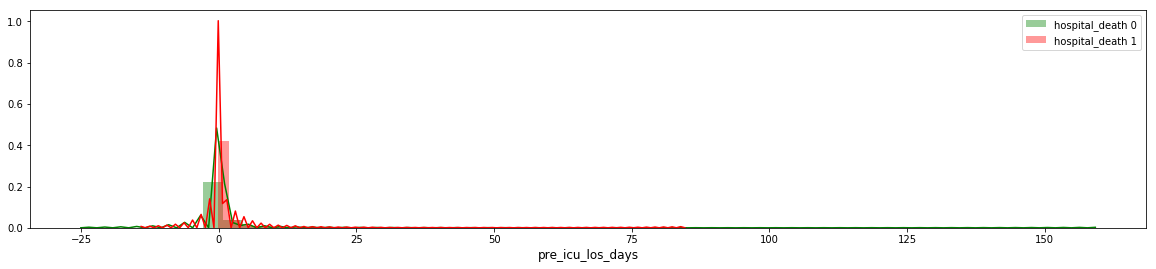

In [12]:
column='pre_icu_los_days'
fig = plt.figure(figsize=(20,4))
df1      = train.loc[train['hospital_death']==0]
df2      = train.loc[train['hospital_death']==1]
sns.distplot(df1[column].fillna(-5),  color='green', label='hospital_death 0', kde=True); 
sns.distplot(df2[column].fillna(-5),  color='red'  , label='hospital_death 1', kde=True); 
fig=plt.legend(loc='best')
plt.xlabel(column, fontsize=12);
plt.show()

In [13]:
train['pre_icu_los_days'] = train['pre_icu_los_days'].apply(lambda x:scipy.special.expit(x) )
test['pre_icu_los_days']  =  test['pre_icu_los_days'].apply(lambda x:scipy.special.expit(x) )

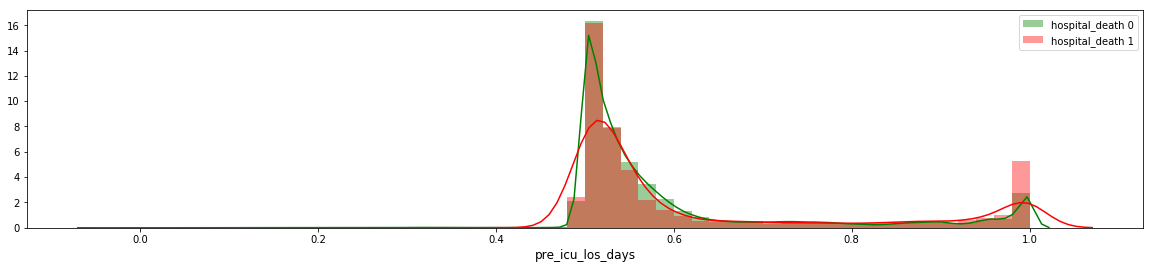

In [14]:
column='pre_icu_los_days'
fig = plt.figure(figsize=(20,4))
df1      = train.loc[train['hospital_death']==0]
df2      = train.loc[train['hospital_death']==1]
sns.distplot(df1[column].fillna(-5),  color='green', label='hospital_death 0', kde=True); 
sns.distplot(df2[column].fillna(-5),  color='red'  , label='hospital_death 1', kde=True); 
fig=plt.legend(loc='best')
plt.xlabel(column, fontsize=12);
plt.show()

In [15]:
if 0:
    train_grp = train.groupby(['icu_id'])
    test_grp = test.groupby(['icu_id'])
    train['urineoutput_apache_min']  = train_grp['urineoutput_apache'].transform(lambda x: np.min(x))
    train['urineoutput_apache_max']  = train_grp['urineoutput_apache'].transform(lambda x: np.max(x))
    test['urineoutput_apache_min']   = test_grp['urineoutput_apache'].transform(lambda x: np.min(x))
    test['urineoutput_apache_max']   = test_grp['urineoutput_apache'].transform(lambda x: np.max(x))
    train['urineoutput_apache'] = ( (train['urineoutput_apache'] - train['urineoutput_apache_min']) / ( train['urineoutput_apache_max']- train['urineoutput_apache_min']) ).fillna(99)
    test['urineoutput_apache']  = ( (test['urineoutput_apache']  - test['urineoutput_apache_min']) / ( test['urineoutput_apache_max'] - test['urineoutput_apache_min'] ) ).fillna(99)
    del train['urineoutput_apache_min'],train['urineoutput_apache_max'],test['urineoutput_apache_min'],test['urineoutput_apache_max']

In [16]:
train.shape

(91698, 207)

In [17]:
if 1 :
    train['comorbidity_score'] = train['aids'].values * 23 + train['cirrhosis'] *4    + train['diabetes_mellitus'] *1  + train['hepatic_failure'] *16 + train['immunosuppression'] *10     + train['leukemia'] * 10     + train['lymphoma'] * 13     + train['solid_tumor_with_metastasis'] * 11
    test['comorbidity_score']  = test['aids'].values * 23    + test['cirrhosis'] *4    + test['diabetes_mellitus'] *1  + test['hepatic_failure'] *16 + test['immunosuppression'] *10     + test['leukemia'] * 10     + test['lymphoma'] * 13     + test['solid_tumor_with_metastasis'] * 11

# Remove Null values

In [18]:
# Drop columns based on threshold limit
if 1:
    print(train.shape)
    threshold = len(train) * 0.20
    train=train.dropna(axis=1, thresh=threshold)
    dropped = [f for f in test.columns if f not in train.columns]
    print('colonne supprimée :',dropped)

(91698, 208)
colonne supprimée : ['h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']


In [19]:
train.shape , test.shape

((91698, 174), (39308, 208))

# categorical

In [20]:
## some encoding for icu_id / hospital
all_df = pd.concat([train,test],axis=0)
frequence_encode = ['icu_id','hospital_id']
for col in frequence_encode :
    hosp_asource = pd.DataFrame(all_df[col])
    hosp_asource = hosp_asource.dropna()
    hosp_asource.columns =[col]
    fe = 100*(hosp_asource.groupby(col).size()/len(hosp_asource))
    train.loc[:,col+'____fe'] = train[col].map(fe)
    test.loc[:,col +'____fe'] = test[col].map(fe)


In [21]:
# fill with missing
train[["apache_2_bodysystem","apache_3j_bodysystem"]]=train[["apache_2_bodysystem","apache_3j_bodysystem"]].fillna('missing')


In [22]:
categoricals_features = set(['ethnicity', 'gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','elective_surgery',
                        'apache_post_operative','arf_apache','intubated_apache','ventilated_apache','aids','cirrhosis',
                        'gcs_eyes_apache','gcs_verbal_apache',   'gcs_motor_apache' , 'gcs_unable_apache',
                        'diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','apache_3j_bodysystem','apache_2_bodysystem',
                        'apache_2_diagnosis'])       
    

In [23]:
list(train.columns)

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_potassium_max',
 'h1_potassium_min',
 'h1_sodium_max',
 'h1_sodium_min',
 'd1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'Standard deviation(age)',
 'Standard deviation(height)',
 'Standard deviation(weight)',
 'Standard deviation(urineoutput_apache)',
 'Mean(h1_platelets_min)',
 'Standard deviation(h1_platelets_min)',
 'Mean(h1_arterial_po2_min)',
 'Standard deviation(h1_arterial_po2_min)',
 'num_Cluster number_______________',
 'STD____age',
 'MEAN____age',
 'STD____height',
 'MEAN____height',
 'STD____weight',
 'MEAN____weight',
 'STD____urineoutput_apache',
 'MEAN____urineoutput_apache',
 'STD____h1_platelets_min',
 'MEAN____h1_platelets_min',
 'STD____h1_arterial_po2_min',
 'MEAN____h1_arterial_po2_min',
 'comorbidity_score',
 'icu_id____fe',
 'hospital_id____fe']

In [24]:
# this is the list of all input feature we would like our model to use (we remove the target and the ids.)
to_remove=[ 'MEAN____age', 'STD____height', 'MEAN____height', 'STD____weight', 'MEAN____weight', 'Standard deviation(age)', 'Standard deviation(height)', 'Standard deviation(weight)', 'Standard deviation(urineoutput_apache)', 'Mean(h1_platelets_min)', 'Standard deviation(h1_platelets_min)', 'Mean(h1_arterial_po2_min)', 'Standard deviation(h1_arterial_po2_min)', 'hospital_id','icu_id','ethnicity','gender','patient_id','encounter_id','hospital_death','apache_4a_hospital_death_prob','apache_4a_icu_death_prob',  'apache_2_bodysystem' ]
features = [col for col in train.columns if col not in to_remove]


# this is a list of features that look like to be categorical
categoricals_features = [col for col in categoricals_features if col not in to_remove]


In [25]:
print('number of features ' , len(features))
print('shape of train / test ', train.shape , test.shape)

number of features  153
shape of train / test  (91698, 176) (39308, 210)


In [26]:
# categorical feature need to be transform to numeric for mathematical purpose.
# different technics of categorical encoding exists here we will rely on our model API to deal with categorical
# still we need to encode each categorical value to an id , for this purpose we use LabelEncoder

print('Transform all String features to category.\n')
for usecol in categoricals_features:
    train[usecol] = train[usecol].astype('str')
    test[usecol] = test[usecol].astype('str')
    
    #Fit LabelEncoder
    le = LabelEncoder().fit(
            np.unique(train[usecol].unique().tolist()+
                       test[usecol].unique().tolist()))

    #At the end 0 will be used for dropped values
    train[usecol] = le.transform(train[usecol])+1
    test[usecol]  = le.transform(test[usecol])+1
    
    train[usecol] = train[usecol].replace(np.nan, -1).astype('int').astype('category')
    test[usecol]  = test[usecol].replace(np.nan , -1).astype('int').astype('category')

Transform all String features to category.



In [27]:
print('number of features ' , len(features))
print('shape of train / test ', train.shape , test.shape)

number of features  153
shape of train / test  (91698, 176) (39308, 210)


In [28]:
num_feature = [col for col in features if col not in categoricals_features]
drop_columns=[]
lowvar_columns=[]
if 1 :
    threshold = 0.01
    lowvar_columns = train[num_feature].std()[train[num_feature].std() < threshold].index.values
    print(len(lowvar_columns),lowvar_columns)

1 ['readmission_status']


In [29]:
num_feature = [col for col in features if col not in categoricals_features and train[col].dtype != 'object']
drop_columns=[]
corr = train[num_feature].corr()
# Drop highly correlated features 
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >=0.99999 :
            if columns[j]:
                columns[j] = False
                print('FEAT_A: {} FEAT_B: {} - Correlation: {}'.format(train[num_feature].columns[i] , train[num_feature].columns[j], corr.iloc[i,j]))
        elif corr.iloc[i,j] <= -0.995:
            if columns[j]:
                columns[j] = False

drop_columns = train[num_feature].columns[columns == False].values
print('drop_columns',len(drop_columns),drop_columns)

FEAT_A: paco2_apache FEAT_B: paco2_for_ph_apache - Correlation: 1.0
FEAT_A: d1_inr_max FEAT_B: h1_inr_max - Correlation: 1.0
FEAT_A: d1_inr_min FEAT_B: h1_inr_min - Correlation: 1.0
drop_columns 3 ['paco2_for_ph_apache' 'h1_inr_max' 'h1_inr_min']


In [30]:
features = [col for col in features if col not in drop_columns]
features = [col for col in features if col not in lowvar_columns]

In [31]:
print('number of features ' , len(features))
print('shape of train / test ', train.shape , test.shape)

number of features  149
shape of train / test  (91698, 176) (39308, 210)


# Modele

In [32]:
train['hospital_death'].sum()/train['hospital_death'].count()

0.08629413945778534

In [33]:
def LGB_Beyes(subsample_freq,
                    learning_rate,
                    feature_fraction,
                    max_depth,
                    lambda_l1,
                    lambda_l2,
                    scale_pos_weight):
    params={}
    params['subsample_freq']=subsample_freq
    params['learning_rate']=learning_rate
    params['feature_fraction']=feature_fraction
    params['lambda_l1']=lambda_l1
    params['lambda_l2']=lambda_l2
    params['max_depth']=max_depth
    params['scale_pos_weight']=scale_pos_weight
    
    lgb_model= Lgb_Model(train, test, features, n_splits=5, categoricals=categoricals_features,ps=params)
    print('auc: ',lgb_model.score)
    return lgb_model.score

bounds_LGB = {
    'subsample_freq': (1, 10),
    'learning_rate': (0.005, 0.02),
    'feature_fraction': (0.5, 1),
    'lambda_l1': (0, 5),
    'lambda_l2': (0, 5),
    'max_depth': (7, 27),
    'scale_pos_weight': (1, 10),
}

if 0 : 
    LGB_BO = BayesianOptimization(LGB_Beyes, bounds_LGB, random_state=1029)
    import warnings
    init_points = 16
    n_iter = 16
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')    
        LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

In [34]:
#LGB_BO.max['params'] 

In [35]:
params = {'feature_fraction': 0.6239716866923084,
 'lambda_l1': 3.7829641263277085,
 'lambda_l2': 4.943386467111307,
 'learning_rate': 0.005,
 'max_depth': 26.385126885902597,
 'scale_pos_weight': 1.0216958299296113,
 'subsample_freq': 1.2157957796719938}

In [36]:
params = {'feature_fraction': 0.8075255603823841,
 'lambda_l1': 0.4032229484530936,
 'lambda_l2': 4.972979412488055,
 'learning_rate':0.01,# 0.018513665017627048,
 'max_depth': 13.431686430796946,
 'scale_pos_weight': 1.0246364547771694,
 'subsample_freq': 1.0529634535673922}

In [37]:
features

['age',
 'bmi',
 'elective_surgery',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_potassium_max',
 'h1_potassium_min',
 'h1_sodium_max',
 'h1_sodium_min',
 'd1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_3j_bodysystem',
 'num_Cluster number_______________',
 'STD____age',
 'STD____urineoutput_apache',
 'MEAN____urineoutput_apache',
 'STD____h1_platelets_min',
 'MEAN____h1_platelets_min',
 'STD____h1_arterial_po2_min',
 'MEAN____h1_arterial_po2_min',
 'comorbidity_score',
 'icu_id____fe',
 'hospital_id____fe']

In [38]:
train['hospital_death']=train['hospital_death'].astype('int')

In [39]:
train[features].isna().sum()

age                                  4226 
bmi                                  3426 
elective_surgery                     0    
height                               1331 
hospital_admit_source                0    
icu_admit_source                     0    
icu_stay_type                        0    
icu_type                             0    
pre_icu_los_days                     0    
weight                               2717 
albumin_apache                       54367
apache_2_diagnosis                   0    
apache_3j_diagnosis                  1101 
apache_post_operative                0    
arf_apache                           0    
bilirubin_apache                     58122
bun_apache                           19254
creatinine_apache                    18845
fio2_apache                          70854
gcs_eyes_apache                      0    
gcs_motor_apache                     0    
gcs_unable_apache                    0    
gcs_verbal_apache                    0    
glucose_apa

In [40]:
print(len(features))

149


In [41]:
lgb_model = Lgb_Model(train,test, features, n_splits=7 , categoricals=categoricals_features, ps=params)

(78606, 149) (13092, 149) 0.08631656616543266 0.08615948670944087
Training until validation scores don't improve for 100 rounds
[1000]	training's auc: 0.950817	valid_1's auc: 0.903892
[2000]	training's auc: 0.973585	valid_1's auc: 0.905557
Early stopping, best iteration is:
[2060]	training's auc: 0.974612	valid_1's auc: 0.905608
------------------------------------------------------------------------------Partial score of fold 0 is: 0.9056076325904427
(78573, 149) (13125, 149) 0.0863782724345513 0.0857904761904762
Training until validation scores don't improve for 100 rounds
[1000]	training's auc: 0.950485	valid_1's auc: 0.910124
Early stopping, best iteration is:
[1146]	training's auc: 0.954787	valid_1's auc: 0.910464
------------------------------------------------------------------------------Partial score of fold 1 is: 0.9104638974503055
(78593, 149) (13105, 149) 0.08612726324227349 0.08729492560091569
Training until validation scores don't improve for 100 rounds
[1000]	training's 

In [42]:
np.mean(lgb_model.score) , np.mean(lgb_model.fold_score) ,  np.std(lgb_model.fold_score)

(0.908955607454557, 0.9091318517612487, 0.004407353116741299)

In [43]:
weights = {'lbg': 1, 'cat': 0., 'xgb': 0., 'nn': 0.00}
final_pred = (lgb_model.y_pred * weights['lbg']) # + (xgb_model.y_pred * weights['xgb']) + (catb_model.y_pred * weights['cat'])
print(final_pred.shape)
test["hospital_death"] = final_pred
test[["encounter_id","hospital_death"]].to_csv("submission_"+str(np.mean(lgb_model.score))+".csv",index=False)

(39308,)


In [44]:
pd.DataFrame(lgb_model.stat).std().sort_values(ascending=False)

MEAN____urineoutput_apache                        134.39
urineoutput_apache                                 87.19
STD____urineoutput_apache                          85.57
apache_3j_diagnosis                                33.02
d1_arterial_po2_max                                 8.22
num_Cluster number_______________                   7.60
d1_mbp_invasive_max                                 4.99
d1_pao2fio2ratio_max                                4.89
STD____h1_arterial_po2_min                          4.41
pao2_apache                                         4.38
MEAN____h1_arterial_po2_min                         3.84
d1_sysbp_invasive_max                               3.54
h1_glucose_min                                      3.35
h1_glucose_max                                      3.34
d1_platelets_min                                    3.32
MEAN____h1_platelets_min                            3.17
d1_pao2fio2ratio_min                                2.81
map_apache                     

### Feature Importance from the lightgbm model (gain)

In [45]:
imp_df = pd.DataFrame()
imp_df['feature'] = features
imp_df['gain']  = lgb_model.model.feature_importance(importance_type='gain')
imp_df['split'] = lgb_model.model.feature_importance(importance_type='split')

In [46]:
def plot_importances(importances_):
    mean_gain = importances_[['gain', 'feature']].groupby('feature').mean()
    importances_['mean_gain'] = importances_['feature'].map(mean_gain['gain'])
    plt.figure(figsize=(18, 44))
    data_imp = importances_.sort_values('mean_gain', ascending=False)
    sns.barplot(x='gain', y='feature', data=data_imp[:300])
    plt.tight_layout()
    plt.savefig('importances.png')
    plt.show()

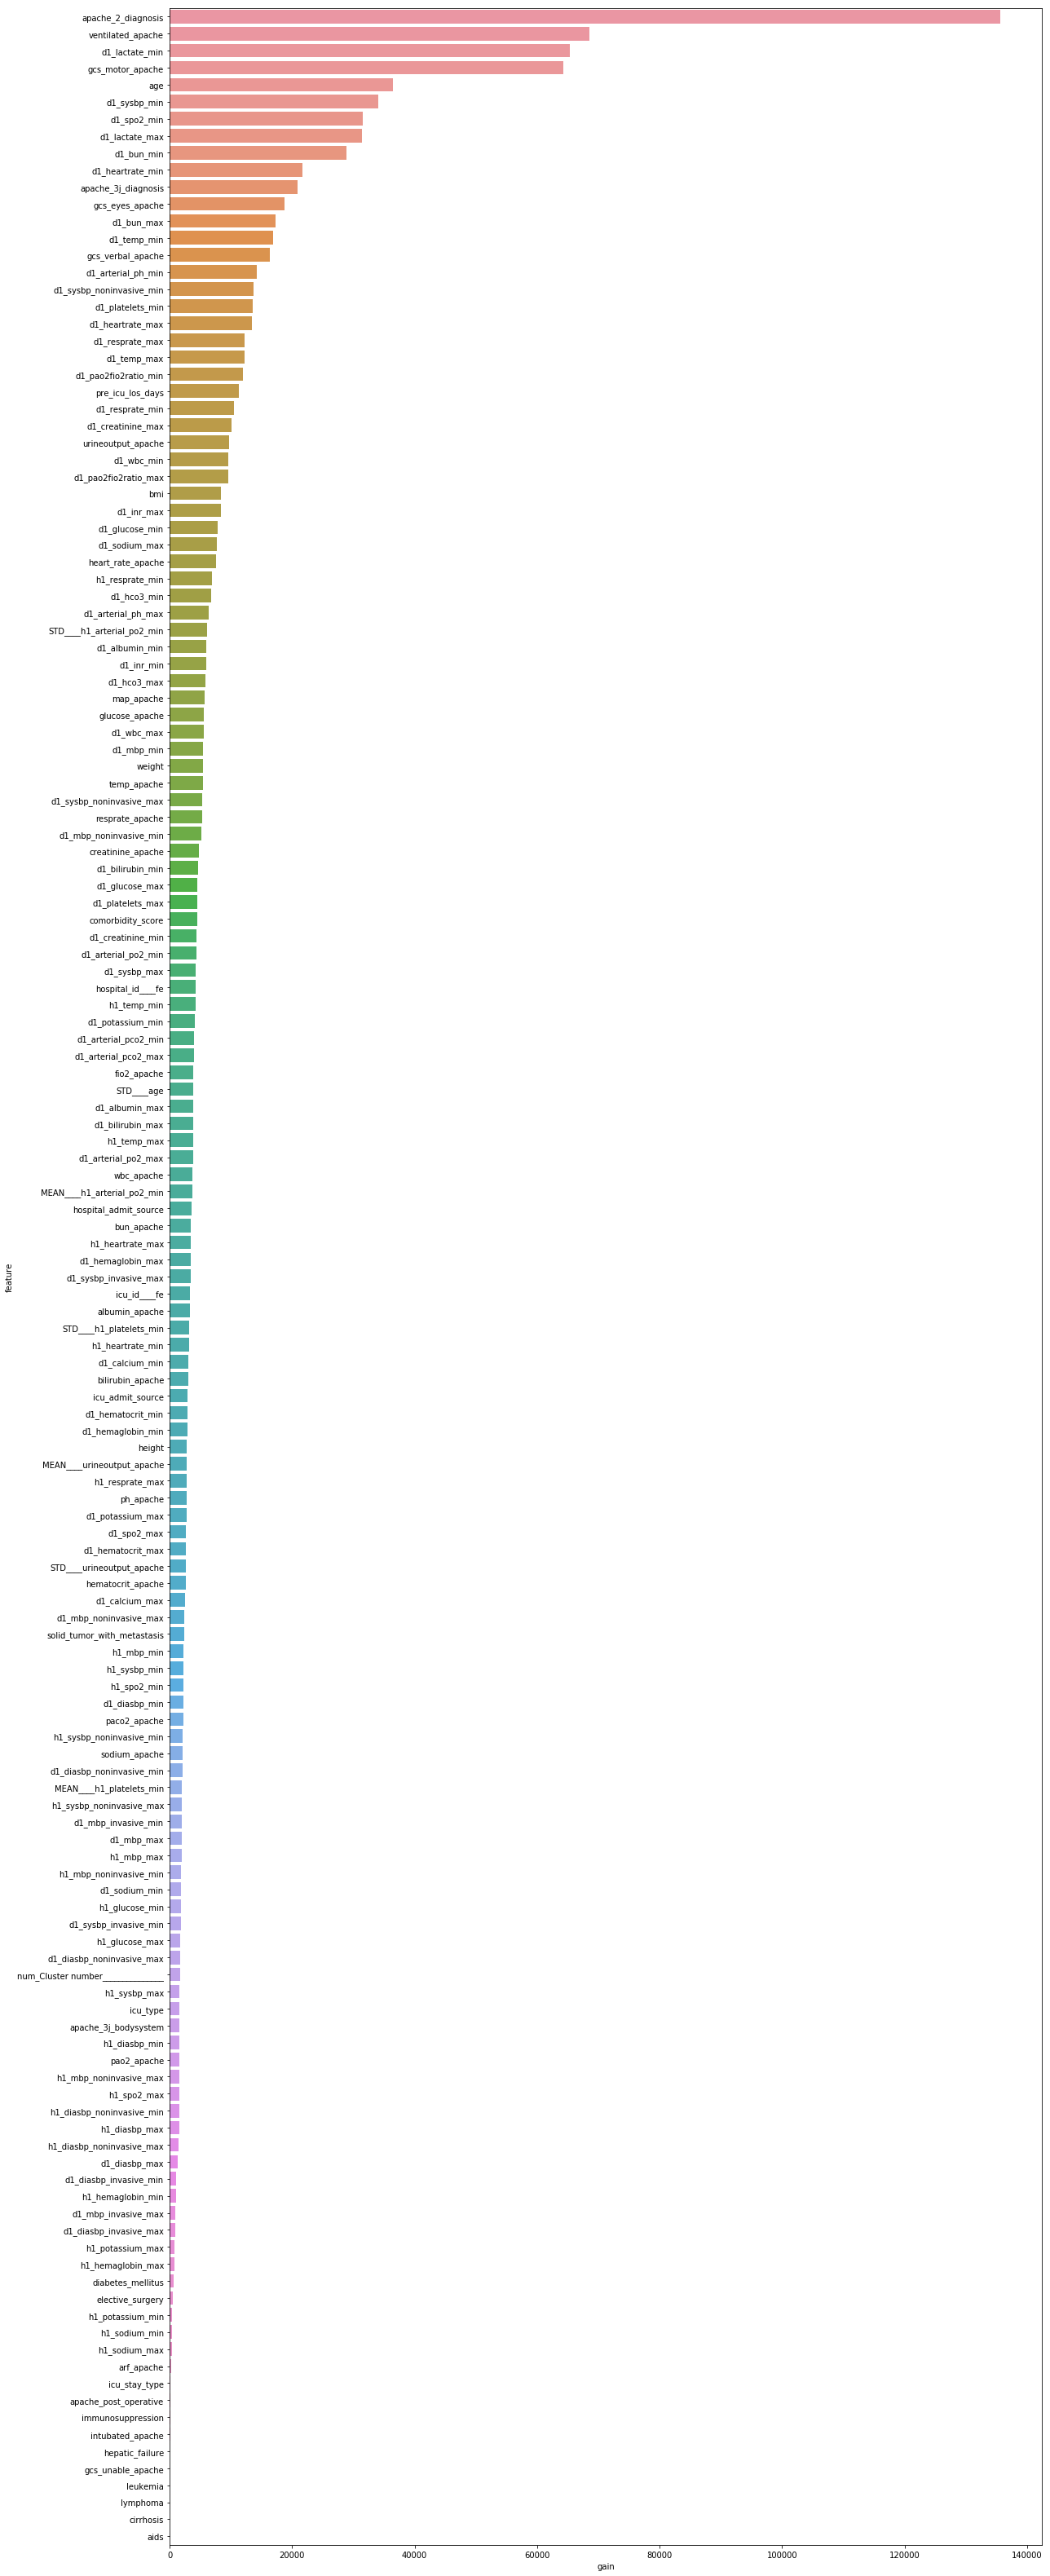

In [47]:
plot_importances(imp_df)

In [48]:
imp_df.sort_values(by=['mean_gain'],ascending=False).reset_index()

,index,feature,gain,split,mean_gain
0,11,apache_2_diagnosis,"135,637.19",4327,"135,637.19"
1,35,ventilated_apache,"68,504.86",145,"68,504.86"
2,104,d1_lactate_min,"65,325.84",492,"65,325.84"
3,20,gcs_motor_apache,"64,232.11",239,"64,232.11"
4,0,age,"36,510.60",1325,"36,510.60"
5,58,d1_sysbp_min,"34,082.42",356,"34,082.42"
6,54,d1_spo2_min,"31,482.00",574,"31,482.00"
7,103,d1_lactate_max,"31,347.24",331,"31,347.24"
8,88,d1_bun_min,"28,910.85",589,"28,910.85"
9,44,d1_heartrate_min,"21,739.31",835,"21,739.31"
